In [81]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

## Default

In [20]:
np.random.seed(12345)
obs_dist = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))

(array([   30.,   250.,   918.,   966.,   592.,  1617.,  3205.,  2017.,
          383.,    22.]),
 array([-2.76545576, -2.19403384, -1.62261191, -1.05118999, -0.47976806,
         0.09165386,  0.66307579,  1.23449771,  1.80591964,  2.37734156,
         2.94876349]),
 <a list of 10 Patch objects>)

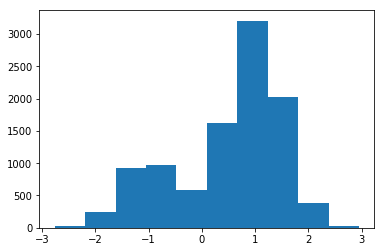

In [25]:
plt.hist(obs_dist)

# Pedro

In [27]:
import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market import market_data as mkt_data

In [28]:
mkt=mkt_data.MarketData()
returns = mkt.crypto_returns_history(
    symbols=['ADA', 'ADST', 'BIS', 'BTC', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP']
)

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [44]:
obs_dist = returns['BTC'].dropna().values

(array([   6.,    8.,   38.,  166.,  957.,  258.,   41.,   13.,    3.,    2.]),
 array([-0.21098965, -0.16431408, -0.11763851, -0.07096294, -0.02428737,
         0.0223882 ,  0.06906377,  0.11573934,  0.16241491,  0.20909048,
         0.25576605]),
 <a list of 10 Patch objects>)

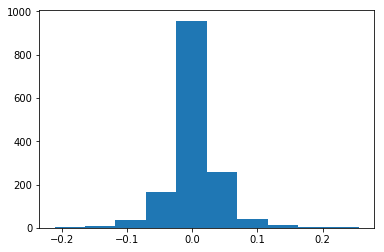

In [45]:
plt.hist(obs_dist)

# Rest of the code

In [46]:
kde = sm.nonparametric.KDEUnivariate(obs_dist)
kde.fit()

In [47]:
len(kde.density)

2048

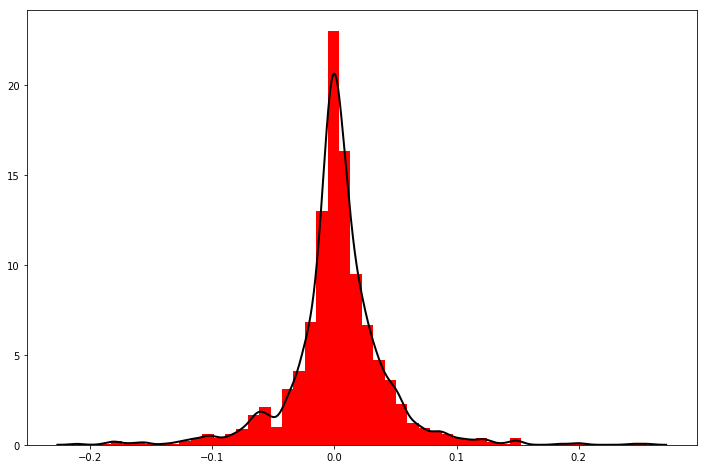

In [48]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist, bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black')

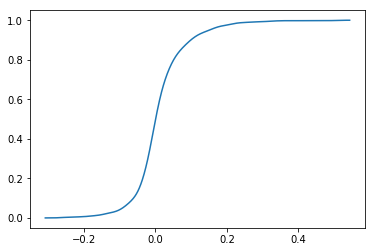

In [43]:
plt.plot(kde.support, kde.cdf)

# Multivariable

In [61]:
import statsmodels.api as sm
nobs = 300
np.random.seed(1234)  # Seed random generator
c1 = np.random.normal(size=(nobs,1))
c2 = np.random.normal(2, 1, size=(nobs,1))

dens_u = sm.nonparametric.KDEMultivariate(
    data=[c1,c2],
    var_type='cc',
    bw='normal_reference')
dens_u.bw

array([ 0.39967419,  0.38423292])

In [71]:
obs1 = returns[['BTC', 'ETH']].dropna().ETH.values
obs2 = returns[['BTC', 'ETH']].dropna().BTC.values
[obs1, obs2]
print(len(obs1))

903


In [79]:
dens_u = sm.nonparametric.KDEMultivariate(
    data=[obs1,obs2],
    var_type='cc',
    bw='normal_reference')
pdf = dens_u.pdf()

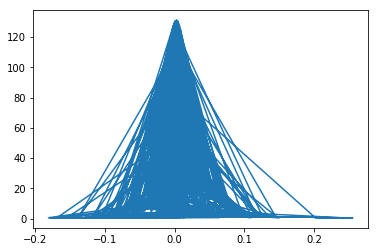

In [77]:
plt.plot(obs2, dens_u.pdf())

In [87]:
df = pd.DataFrame(data = {'ETH':obs1, 'BTC':obs2, 'PDF':pdf})
df

,BTC,ETH,PDF
0,0.015632,-0.068268,27.655768
1,-0.004031,0.007584,115.460907
2,0.013599,0.497365,0.695734
3,-0.023662,0.129966,6.253478
4,-0.004529,0.506211,0.695734
5,0.000475,-0.005550,130.280073
6,-0.015545,-0.076503,20.711418
7,-0.011623,-0.071006,27.517883
8,0.004333,-0.230780,0.849966
9,-0.178838,-0.088382,0.505985
